# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/manuscript-v2.2-red?style=for-the-badge)](https://doi.org/10.1116/5.0022349)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np
import scipy.constants as sc
import scipy.linalg as sl

# qom modules
from qom.solvers.differential import ODESolver
from qom.solvers.measure import get_Wigner_distributions_single_mode
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter
from qom.utils.loopers import wrap_looper

# initialize logger
init_log()

MainThread               INFO    2024-01-29 22:31:48.398: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

Wigner functions ($W$) of (a) vacuum state, (b) coherent state with $\alpha = 1 \pm i$, and (c) squeezed state with $r = 0.5$ as a function of their dimensional position ($q$) and momentum ($p$) operators.

MainThread               INFO    2024-01-29 22:31:50.459: (qom.solvers.measure) -----------------------------------------Measures Obtained	


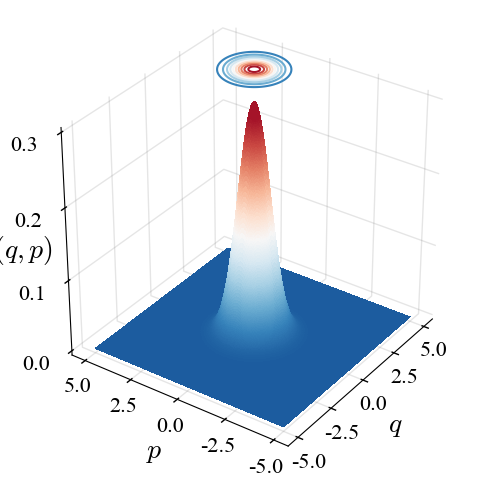

In [2]:
# frequently used variables
qs = np.linspace(-5, 5, 401)
ps = np.linspace(-5, 5, 401)
plotter_params = {
    'type'      : 'surface_cz',
    'x_label'   : '$q$',
    'x_limits'  : [-5.5, 5.5],
    'x_tick_pad': 0,
    'x_ticks'   : [-5, -2.5, 0, 2.5, 5],
    'y_label'   : '$p$',
    'y_limits'  : [-5.5, 5.5],
    'y_tick_pad': 0,
    'y_ticks'   : [-5, -2.5, 0, 2.5, 5],
    'v_label'   : '$W(q, p)$',
    'v_ticks'   : [0.0, 0.1, 0.2, 0.3]
}

# vacuum state
plotter = MPLPlotter(
    axes={
        'X' : qs,
        'Y' : ps
    },
    params=plotter_params
)
plotter.update(
    vs=get_Wigner_distributions_single_mode(
        Corrs = np.array([[[1/2, 0], [0, 1/2]]]),
        params={
            'show_progress' : True,
            'wigner_xs'     : qs,
            'wigner_ys'     : ps
        }
    )[0, 0]
)
plotter.show()

MainThread               INFO    2024-01-29 22:32:07.606: (qom.solvers.measure) -----------------------------------------Measures Obtained	


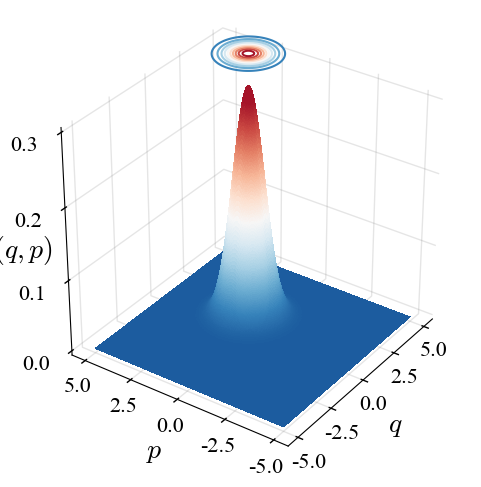

In [3]:
# coherent state
alpha = 1 + 1j
plotter = MPLPlotter(
    axes={
        'X' : qs,
        'Y' : ps
    },
    params=plotter_params
)
plotter.update(
    vs=get_Wigner_distributions_single_mode(
        Corrs = np.array([[[1/2, 0], [0, 1/2]]]),
        params={
            'show_progress' : True,
            'wigner_xs'     : qs - np.real(alpha),
            'wigner_ys'     : ps - np.imag(alpha)
        }
    )[0, 0]
)
plotter.show()

MainThread               INFO    2024-01-29 22:32:24.735: (qom.solvers.measure) -----------------------------------------Measures Obtained	


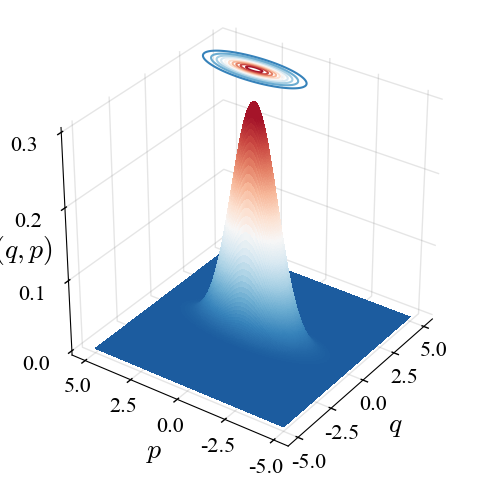

In [4]:
# squeezed state
r = 0.5
V_s = [[np.exp(-2*r) / 2, 0], [0, np.exp(2*r) / 2]]
# plotter
plotter = MPLPlotter(
    axes={
        'X' : qs,
        'Y' : ps
    },
    params=plotter_params
)
plotter.update(
    vs=get_Wigner_distributions_single_mode(
        Corrs = np.array([V_s]),
        params={
            'show_progress' : True,
            'wigner_xs'     : qs,
            'wigner_ys'     : ps
        }
    )[0, 0]
)
plotter.show()

## Figure 5

Top: Variation of stationary optomechanical entanglement $E_{N}$ between the optical mode and the mechanical mode with change in effective detuning $\Delta$ for different values of coupling strength $g$.
Bottom: The unique elements of the covariance matrix $V$ at $\Delta = \omega_{m}$.
Higher values of $g$ result in a more negative value of $\det[C]$ which lead to larger values of entanglement.
Base parameters used are $\omega_{m} / ( 2 \pi ) = 10$ MHz, $\kappa / \omega_{m} = 0.75$ $\gamma / \omega_{m} = 10^{-5}$, $T = 0.4$ K, and $E_{0} / \omega_{m} = 6.4 \times 10^{3}$.

MainThread               INFO    2024-01-29 22:32:42.250: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-29 22:32:42.736: (qom.loopers.XYLooper) -----------------------------------------Results Obtained	


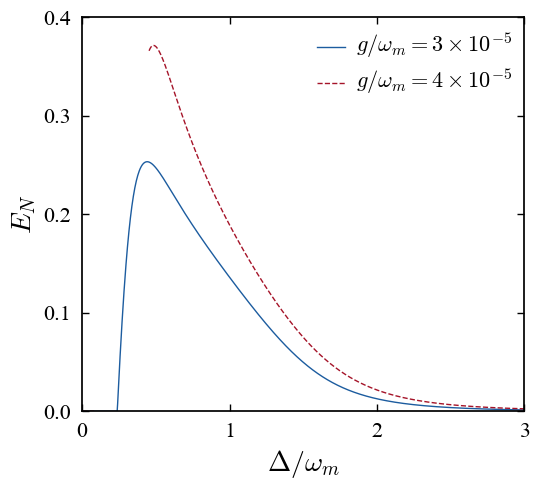

In [5]:
# system parameters
omega_m = 2*np.pi*1e7
T       = 0.4e-3
E_0     = 6.4e3 * omega_m
gamma   = 1e-5 * omega_m              
kappa   = 7.5e-1 * omega_m
gs      = np.array([3, 4]) * 1e-5 * omega_m
Deltas  = np.linspace(0, 3, 901) * omega_m

# noise matrix
if T == 0:
    n = 0
else:
    n = 1 / (np.exp(sc.hbar*omega_m/sc.k/T) - 1)
D = [   [   kappa/2,   0,          0,                  0                   ],
        [   0,          kappa/2,   0,                  0                   ],
        [   0,          0,          gamma*(2*n + 1)/2, 0                   ],
        [   0,          0,          0,                  gamma*(2*n + 1)/2  ]   ]

# function to obtain the entanglement
def get_entanglement_if_stable(system_params):
    # update parameters
    Delta = system_params['Delta']
    G = system_params['g'] * E_0 / np.sqrt(kappa**2 / 4 + Delta**2)

    # calculate stability condition
    expr_1 = Delta**4*gamma*kappa + Delta**2*gamma**3*kappa/2 + Delta**2*gamma**2*kappa**2 + Delta**2*gamma*kappa**3/2 - 2*Delta**2*gamma*kappa*omega_m**2 + 4*Delta*G**2*gamma**2*omega_m + 8*Delta*G**2*gamma*kappa*omega_m + 4*Delta*G**2*kappa**2*omega_m + gamma**5*kappa/16 + gamma**4*kappa**2/4 + 3*gamma**3*kappa**3/8 + gamma**3*kappa*omega_m**2/2 + gamma**2*kappa**4/4 + gamma**2*kappa**2*omega_m**2 + gamma*kappa**5/16 + gamma*kappa**3*omega_m**2/2 + gamma*kappa*omega_m**4
    expr_2 = 4*Delta**2*gamma**2 + 16*Delta**2*omega_m**2 - 64*Delta*G**2*omega_m + gamma**2*kappa**2 + 4*kappa**2*omega_m**2

    # calculate entanglement if stable
    if (expr_1 > 0 and expr_2 > 0):
        # drift matrix
        A = [   [   -kappa/2,   Delta,      0,          0           ],
                [   -Delta,     -kappa/2,   2*G,        0           ],
                [   0,          0,          -gamma/2,   omega_m     ],
                [   2*G,        0,          -omega_m,   -gamma/2    ]   ]
        # invariants
        V = sl.solve_lyapunov(np.array(A), -1 * np.array(D))
        A = [   [   V[0][0],    V[0][1]     ],
                [   V[1][0],    V[1][1]     ]   ]
        B = [   [   V[2][2],    V[2][3]     ],
                [   V[3][2],    V[3][3]     ]   ]
        C = [   [   V[0][2],    V[0][3]     ],
                [   V[1][2],    V[1][3]     ]   ]
        Sigma   = np.linalg.det(A) + np.linalg.det(B) - 2*np.linalg.det(C)
        # entanglement
        return np.max([0, - np.log(2*np.sqrt((Sigma - np.sqrt(Sigma**2 - 4*np.linalg.det(V)))/2))])
    else:
        return np.NaN
    
# loop and plot
looper = wrap_looper(
    looper_name='XYLooper',
    func=get_entanglement_if_stable,
    params={
        'show_progress'     : True,
        'X'                 : {
            'var'   : 'Delta',
            'val'   : Deltas
        },
        'Y'                 : {
            'var'   : 'g',
            'val'   : gs
        }
    },
    params_system={},
    plot=True,
    params_plotter={
        'type'          : 'lines',
        'x_label'       : '$\\Delta / \\omega_{m}$',
        'x_tick_labels' : [0, 1, 2, 3],
        'x_ticks'       : Deltas[::300],
        'v_label'       : '$E_N$',
        'v_ticks'       : [0.0, 0.1, 0.2, 0.3, 0.4],
        'show_legend'   : True,
        'legend_labels' : [
            '$g / \\omega_{m} = 3 \\times 10^{-5}$',
            '$g / \\omega_{m} = 4 \\times 10^{-5}$'
        ],
        'width'         : 5.5
    }
)

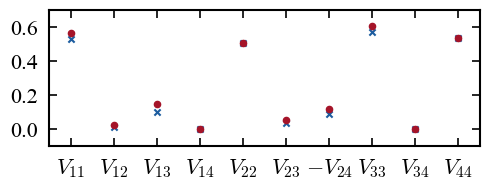

In [6]:
# update parameters
Delta = omega_m

# obtain elements
Vs = np.zeros((2, 10), dtype=np.float_)
idxs = np.triu_indices(4)
for i in range(2):
    # update parameters
    G = gs[i] * E_0 / np.sqrt(kappa**2 / 4 + Delta**2)
    # drift matrix
    A = [   [   -kappa/2,   Delta,      0,          0           ],
            [   -Delta,     -kappa/2,   2*G,        0           ],
            [   0,          0,          -gamma/2,   omega_m     ],
            [   2*G,        0,          -omega_m,   -gamma/2    ]   ]
    # covariance matrix
    _V = sl.solve_lyapunov(np.array(A), -1 * np.array(D))
    Vs[i] = _V[idxs]
    Vs[i][6] *= -1 

# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'          : 'scatters',
        'sizes'         : [20, 20],
        'styles'        : ['x', 'o'],
        'x_label'       : '',
        'x_limits'      : [-0.5, 9.5],
        'x_tick_labels' : ['$V_{' + str(idx) + '}$' if idx != 24 else '$-V_{24}$' for idx in ((idxs[0] + 1) * 10 + idxs[1] + 1)],
        'x_ticks'       : list(range(10)),
        'v_label'       : '',
        'v_limits'      : [-0.1, 0.7],
        'v_ticks'       : [0.0, 0.2, 0.4, 0.6],
        'width'         : 5.0,
        'height'        : 2.0
    }
)
plotter.update(
    vs=Vs,
    xs=list(range(10))
)
plotter.show()

## Figure 6

Variation of stationary optomechanical entanglement $E_{N}$ between the optical mode and the mechanical mode with change in effective detuning $\Delta$ and coupling strength $g$.
The areas in gray mark the regimes where the stability criteria are not met.
Parameters used are the same as those for Figure 5.

MainThread               INFO    2024-01-29 22:32:43.625: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-29 22:35:27.054: (qom.loopers.XYLooper) -----------------------------------------Results Obtained	


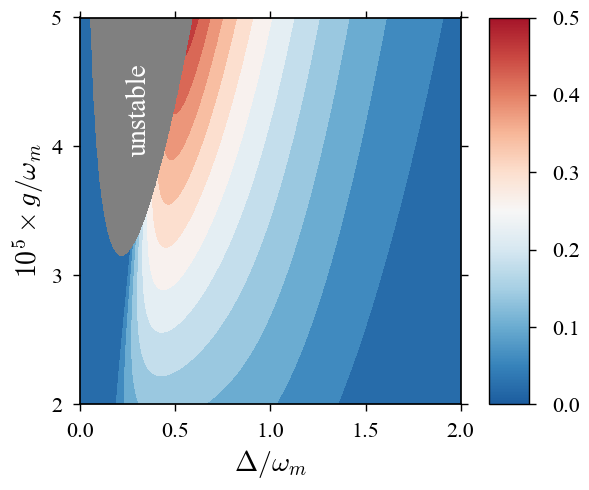

In [7]:
# update parameters
gs      = np.linspace(2, 5, 901) * 1e-5 * omega_m
Deltas  = np.linspace(0, 2, 1001) * omega_m
    
# loop and plot
looper = wrap_looper(
    looper_name='XYLooper',
    func=get_entanglement_if_stable,
    params={
        'show_progress'     : True,
        'X'                 : {
            'var'   : 'Delta',
            'val'   : Deltas
        },
        'Y'                 : {
            'var'   : 'g',
            'val'   : gs
        }
    },
    params_system={},
    plot=True,
    params_plotter={
        'type'              : 'contourf',
        'x_label'           : '$\\Delta / \\omega_{m}$',
        'x_tick_labels'     : [0.0, 0.5, 1.0, 1.5, 2.0],
        'x_tick_position'   : 'both-out',
        'x_ticks'           : Deltas[::250],
        'y_label'           : '$10^{5} \\times g / \\omega_{m}$',
        'y_tick_labels'     : [2, 3, 4, 5],
        'y_ticks'           : gs[::300],
        'y_tick_position'   : 'both-out',
        'show_cbar'         : True,
        'cbar_ticks'        : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        'width'             : 5.5,
        'annotations'       : [{
            'text'          : 'unstable',
            'xy'            : [0.21, 0.68],
            'orientation'   : 'vertical',
            'color'         : 'w'
        }]
    }
)

## Figure 7

Top: Phase-space trajectories of the optical mode and the mechanical mode for a modulated optomechanical system.
The limit cycles traced by the dimensionless position and momentum quadratures are marked in red.
Bottom: Variation of optomechanical entanglement quantified by logarithmic negativity $E_{N}$ in absence (blue) as well as presence (red) of modulation with $E_{1}/E_{0} = 0.5$ and $\tau = 1 / \omega_{m}$.
Other parameters used are the same as those for Figure 5.

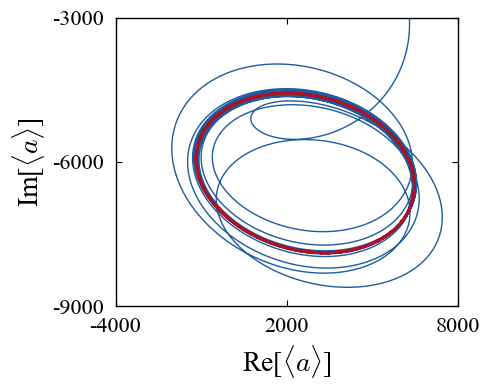

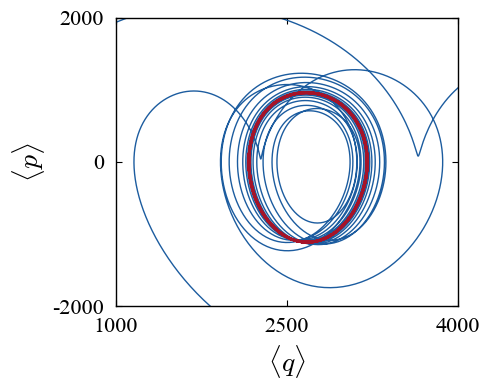

In [8]:
# system parameters
omega_m = 2 * np.pi * 1e7
T       = 0.4e-3
Delta_0 = omega_m
E_0     = 6.4e3 * omega_m
g_0     = 3.5e-5 * omega_m
gamma   = 1e-5 * omega_m
kappa   = 7.5e-1 * omega_m
Omega   = 2 * omega_m
tau     = 2 * np.pi / Omega
ts      = np.linspace(0, 50 * tau, 5001)
rates   = np.zeros(4, dtype=np.float_)

# noise matrix
if T == 0:
    n = 0
else:
    n = 1 / (np.exp(sc.hbar*omega_m/sc.k/T) - 1)
D = [   [   kappa/2,   0,          0,                  0                   ],
        [   0,          kappa/2,   0,                  0                   ],
        [   0,          0,          gamma*(2*n + 1)/2, 0                   ],
        [   0,          0,          0,                  gamma*(2*n + 1)/2  ]   ]

# function for mode rates
def func_ode(t, v, c):
    # extract modes
    q, p = v[0:2]
    alpha = v[2] + 1j * v[3]
    # update amplitude
    E = E_0 + c[0] * (np.exp(-1j * Omega * t) + np.exp(1j * Omega * t))
    # update rates
    rates[0] = omega_m * p
    rates[1] = -omega_m * q - gamma / 2 * p + np.sqrt(2) * g_0 * np.real(np.conjugate(alpha) * alpha)
    dalpha_dt= -(1j * Delta_0 + kappa / 2) * alpha + 1j * np.sqrt(2) * g_0 * alpha * q + E
    rates[2] = np.real(dalpha_dt)
    rates[3] = np.imag(dalpha_dt)

    return rates

# initialize ODE solver
solver = ODESolver(
    func=func_ode,
    params={
        'show_progress' : True,
        'ode_method'    : 'vode'
    }
)
# solve ODE without modulation
E_1 = 0.0
vs_0 = solver.solve(
    T=ts,
    iv=np.zeros(4, dtype=np.float_),
    c=[E_1]
)
# solve ODE without modulation
E_1 = 3.2e3 * omega_m
vs_1 = solver.solve(
    T=ts,
    iv=np.zeros(4, dtype=np.float_),
    c=[E_1]
)

# plot optical mode
plotter = MPLPlotter(
    axes={},
    params={
        'type'      : 'lines',
        'sizes'     : [1, 2],
        'x_label'   : 'Re[$\\langle a \\rangle$]',
        'x_ticks'   : [-4000, 2000, 8000],
        'v_label'   : 'Im[$\\langle a \\rangle$]',
        'v_ticks'   : [-9000, -6000, -3000],
        'height'    : 4.0
    }
)
plotter.update(
    vs=[vs_1[:, 3], vs_1[-1000:, 3]],
    xs=[vs_1[:, 2], vs_1[-1000:, 2]]
)
plotter.show()

# plot mechanical mode
plotter = MPLPlotter(
    axes={},
    params={
        'type'      : 'lines',
        'sizes'     : [1, 2],
        'x_label'   : '$\\langle q \\rangle$',
        'x_ticks'   : [1000, 2500, 4000],
        'v_label'   : '$\\langle p \\rangle$',
        'v_ticks'   : [-2000, 0, 2000],
        'height'    : 4.0
    }
)
plotter.update(
    vs=[vs_1[:, 1], vs_1[-1000:, 1]],
    xs=[vs_1[:, 0], vs_1[-1000:, 0]]
)
plotter.show()

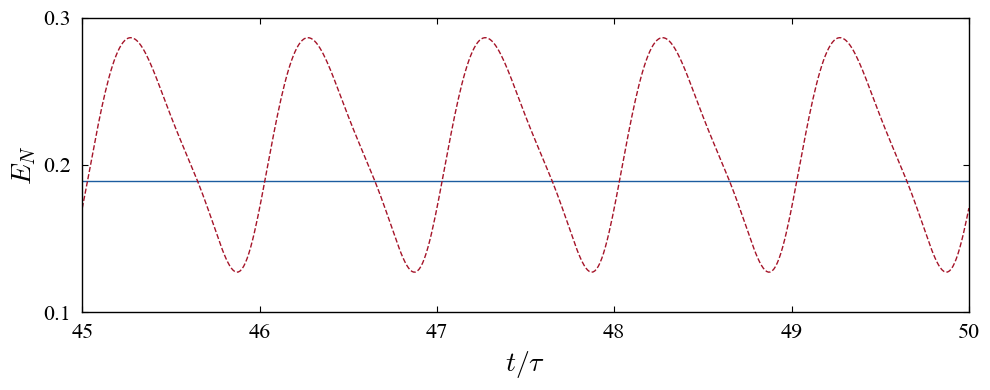

In [9]:
# function to obtain the entanglement
def get_entanglement(v):
    # update parameters
    g = g_0 * (v[2] + 1j * v[3])
    Delta = Delta_0 - np.sqrt(2) * g_0 * np.real(v[0])
    # drift matrix
    A = [   [   -kappa/2,       Delta,          -2*np.imag(g),  0           ],
            [   -Delta,         -kappa/2,       2*np.real(g),   0           ],
            [   0,              0,              -gamma/2,       omega_m     ],
            [   2*np.real(g),   2*np.imag(g),   -omega_m,       -gamma/2    ]   ]
    # invariants
    V = sl.solve_lyapunov(np.array(A), -np.array(D))
    A = [   [   V[0][0],    V[0][1]     ],
            [   V[1][0],    V[1][1]     ]   ]
    B = [   [   V[2][2],    V[2][3]     ],
            [   V[3][2],    V[3][3]     ]   ]
    C = [   [   V[0][2],    V[0][3]     ],
            [   V[1][2],    V[1][3]     ]   ]
    Sigma   = np.linalg.det(A) + np.linalg.det(B) - 2*np.linalg.det(C)
    # return entanglement
    return np.max([0, - np.log(2*np.sqrt((Sigma - np.sqrt(Sigma**2 - 4*np.linalg.det(V)))/2))])

# calculate entanglement
E_N_0 = [get_entanglement(vs_0[i]) for i in range(4500, 5001)]
E_N_1 = [get_entanglement(vs_1[i]) for i in range(4500, 5001)]

# plot entanglement
plotter = MPLPlotter(
    axes={},
    params={
        'type'          : 'lines',
        'x_label'       : '$t / \\tau$',
        'x_tick_labels' : [45, 46, 47, 48, 49, 50],
        'x_ticks'       : ts[4500:5001:100],
        'v_label'       : '$E_{N}$',
        'v_ticks'       : [0.1, 0.2, 0.3],
        'width'         : 10.0,
        'height'        : 4.0
    }
)
plotter.update(
    vs=[E_N_0, E_N_1],
    xs=ts[4500:5001]
)
plotter.show()

## Figure 8

Wigner functions of the normal modes, $q_{\pm} = ( q_{1} \pm q_{2} ) / \sqrt{2}$ and $p_{\pm} = ( p_{1} \pm p_{2} ) / \sqrt{2}$ ($q_{i}$, $p_{i}$ are the dimensionless position and momentum operators of the $i$-th
mechanical oscillator) for a coupled optomechanical system with modulation in the mechanical coupling (Reference 36) governed by the coefficient $\lambda(t) = \lambda_{0} \cos{(\Omega t)}$.
The figures on the top [(a) and (b)] are with $\lambda_{0} / \omega_{m} = 0.005$ at $t / \tau = 5000$.
The ones on the bottom [(c) and (d)] are with $\lambda_{0} / \omega_{m} = 0.01$ at $t / \tau = 300.45$.
Other parameters used are the same as those used by in the cited article.

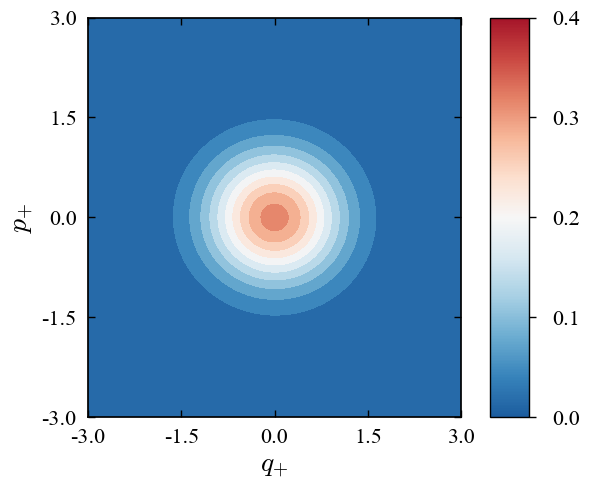

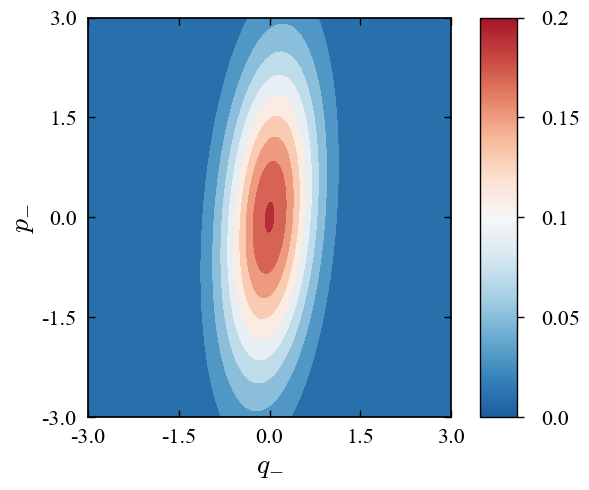

In [10]:
# frequently used variables
dim = 601
xs = np.around(np.linspace(-3, 3, dim), 2)
ys = np.around(np.linspace(-3, 3, dim), 2)
Wp = np.zeros((dim, dim), dtype=np.float_)
Wm = np.zeros((dim, dim), dtype=np.float_)
plotter_params = {
    'type'      : 'contourf',
    'x_ticks'   : [-3, -1.5, 0, 1.5, 3],
    'y_ticks'   : [-3, -1.5, 0, 1.5, 3],
    'show_cbar' : True,
    'width'     : 5.5
}

# load data
i = 0
with open('../../data/v2.2_qom-v1.0.1/8a-8b.txt', 'r') as datafile:
    for line in datafile:
        content = line.split(' ')
        x = float(content[0])
        y = float(content[1])
        if x in xs and y in ys:
            Wp[int(i % dim), int(i / dim)] = np.float_(content[2])
            Wm[int(i % dim), int(i / dim)] = np.float_(content[3])
            i += 1
    datafile.close()
# plus mode
plotter_params['x_label'] = '$q_{+}$'
plotter_params['y_label'] = '$p_{+}$'
plotter_params['cbar_ticks'] = [0.0, 0.1, 0.2, 0.3, 0.4]
plotter = MPLPlotter(
    axes={
        'X' : xs,
        'Y' : ys
    },
    params=plotter_params
)
plotter.update(
    vs=Wp
)
plotter.show()
# minus mode
plotter_params['x_label'] = '$q_{-}$'
plotter_params['y_label'] = '$p_{-}$'
plotter_params['cbar_ticks'] = [0.00, 0.05, 0.1, 0.15, 0.20]
plotter = MPLPlotter(
    axes={
        'X' : xs,
        'Y' : ys
    },
    params=plotter_params
)
plotter.update(
    vs=Wm
)
plotter.show()

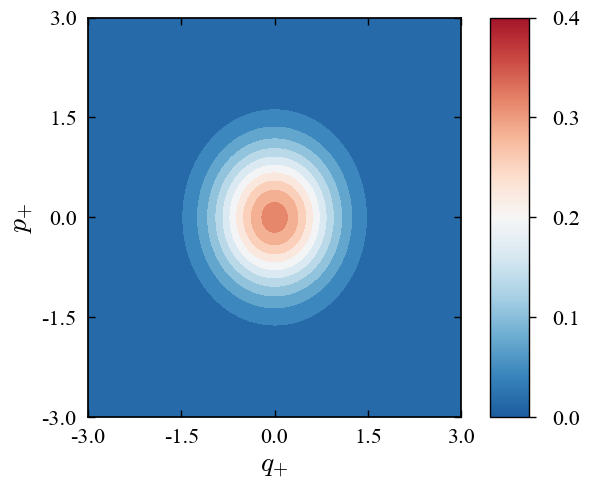

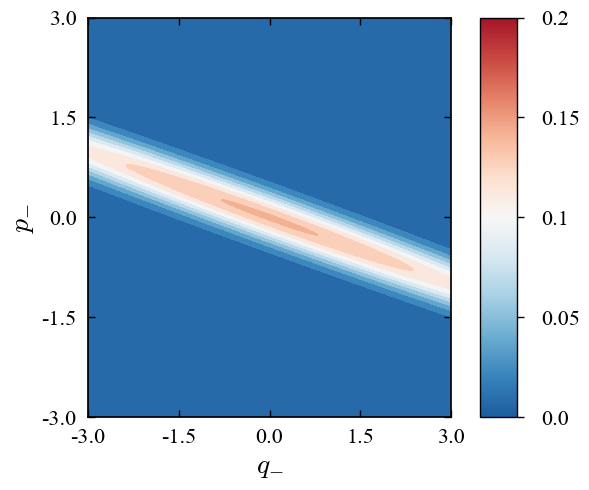

In [11]:
# frequently used variables
dim = 601
xs = np.around(np.linspace(-3, 3, dim), 2)
ys = np.around(np.linspace(-3, 3, dim), 2)
Wp = np.zeros((dim, dim), dtype=np.float_)
Wm = np.zeros((dim, dim), dtype=np.float_)
plotter_params = {
    'type'      : 'contourf',
    'x_ticks'   : [-3, -1.5, 0, 1.5, 3],
    'y_ticks'   : [-3, -1.5, 0, 1.5, 3],
    'show_cbar' : True,
    'width'     : 5.5
}

# load data
i = 0
with open('../../data/v2.2_qom-v1.0.1/8c-8d.txt', 'r') as datafile:
    for line in datafile:
        content = line.split(' ')
        x = float(content[0])
        y = float(content[1])
        if x in xs and y in ys:
            Wp[int(i % dim), int(i / dim)] = np.float_(content[2])
            Wm[int(i % dim), int(i / dim)] = np.float_(content[3])
            i += 1
    datafile.close()
# plus mode
plotter_params['x_label'] = '$q_{+}$'
plotter_params['y_label'] = '$p_{+}$'
plotter_params['cbar_ticks'] = [0.0, 0.1, 0.2, 0.3, 0.4]
plotter = MPLPlotter(
    axes={
        'X' : xs,
        'Y' : ys
    },
    params=plotter_params
)
plotter.update(
    vs=Wp
)
plotter.show()
# minus mode
plotter_params['x_label'] = '$q_{-}$'
plotter_params['y_label'] = '$p_{-}$'
plotter_params['cbar_ticks'] = [0.00, 0.05, 0.1, 0.15, 0.20]
plotter = MPLPlotter(
    axes={
        'X' : xs,
        'Y' : ys
    },
    params=plotter_params
)
plotter.update(
    vs=Wm
)
plotter.show()